In [1]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


# Comparison between binomial samples and normal distribution

In [11]:
np.random.seed(1024)
dist_n = np.random.randn(1000)

print "normal on normal", scipy.stats.kstest(dist_n,'norm')
print "normal on normal", scipy.stats.anderson(dist_n, dist='norm')
print "" 

dist_b = np.random.binomial(1, 0.5, 1000)
print "binomial on normal", scipy.stats.kstest(dist_b,'norm')
print "binomial on normal", scipy.stats.anderson(dist_b, dist='norm')

dist_b = np.random.binomial(10, 0.5, 1000)
print "binomial on normal", scipy.stats.kstest(dist_b,'norm')
print "binomial on normal", scipy.stats.anderson(dist_b, dist='norm')

dist_b = np.random.binomial(100, 0.5, 1000)
print "binomial on normal", scipy.stats.kstest(dist_b,'norm')
print "binomial on normal", scipy.stats.anderson(dist_b, dist='norm')

dist_b = np.random.binomial(1000, 0.5, 1000)
print "binomial on normal", scipy.stats.kstest(dist_b,'norm')
print "binomial on normal", scipy.stats.anderson(dist_b, dist='norm')

threshold = scipy.stats.anderson(dist_n, dist='norm')[1][scipy.stats.anderson(dist_n, dist='norm')[2]==[1.0]]
print threshold

normal on normal KstestResult(statistic=0.028116235445384774, pvalue=0.40390681252588267)
normal on normal AndersonResult(statistic=0.53752225932453257, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))

binomial on normal KstestResult(statistic=0.5, pvalue=0.0)
binomial on normal AndersonResult(statistic=179.51057304591927, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
binomial on normal KstestResult(statistic=0.96224986805182078, pvalue=0.0)
binomial on normal AndersonResult(statistic=15.549075523867941, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
binomial on normal KstestResult(statistic=1.0, pvalue=0.0)
binomial on normal AndersonResult(statistic=2.1372605818241937, critical_values=array([ 0.574,  0.653,  0.784,  0.914,  1.088]), significance

### As $n$ goes bigger, the sample (binomial, with $p=0.5$) will be more like a normal distribution.

# Plot of the similarity

## Binomial

In [3]:
distpdf_n, mybins_n, = np.histogram(dist_n, density=True)
distpdf_b, mybins_b, = np.histogram(dist_b, density=True)

In [4]:
bincenters_n = mybins_n[:-1] + 0.5*(mybins_n[1] - mybins_n[0])
bincenters_b = mybins_b[:-1] + 0.5*(mybins_b[1] - mybins_b[0])
print "normal on normal", scipy.stats.entropy(distpdf_n, scipy.stats.norm.pdf(bincenters_n))  
print "binomial on normal", scipy.stats.entropy(distpdf_b, scipy.stats.norm.pdf(bincenters_b))

normal on normal 0.00274320145971
binomial on normal inf


In [5]:
narray = range(1,50,1)
ks_b = np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))
chi2_b = np.zeros(len(narray))


def mynorm (x, mu, var):
    return scipy.stats.norm.cdf(x, loc=mu, scale=var)

p=0.5
for i,n in enumerate(narray):
    p=0.1 
    dist = np.random.binomial(n, p, 1000)
 
 
    ks_b[i] = scipy.stats.kstest(dist, mynorm, args=(n*p, n*p*(1.0-p)))[0]
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
    
    mybins=np.linspace(min(dist),max(dist), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])


    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], scipy.stats.norm.pdf(bincenters, loc=n*p, scale=n*p*(1.0-p)))
    

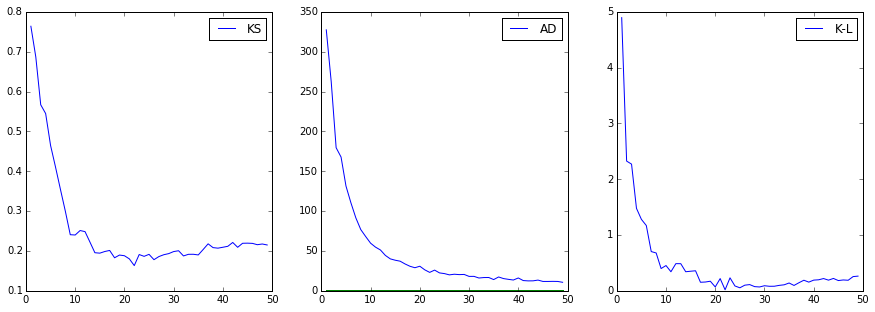

In [6]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_b, label='KS')
pl.legend()

fig.add_subplot(132)
pl.plot(narray, ad_b, label='AD')
pl.plot([narray[0], narray[-1]],[threshold, threshold])
pl.plot()
pl.plot()
pl.legend()

fig.add_subplot(133)
pl.plot(narray, kl_b, label='K-L ')

pl.legend()

## Poisson

In [7]:
narray = range(1,50,1)
ks_b = np.zeros(len(narray))
ad_b = np.zeros(len(narray))
kl_b = np.zeros(len(narray))
chi2_b = np.zeros(len(narray))

In [8]:
np.random.seed(999)
for i,n in enumerate(narray):
    p=0.1 
    dist = np.random.poisson(n, 1000) 
    ks_b[i] = scipy.stats.kstest(dist, mynorm, args=(n, n))[0]
    ad_b[i] = scipy.stats.anderson(dist, dist='norm')[0]
        
    mybins = np.linspace(min(dist),max(dist), 10) 
    bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])
 
    kl_b [i] =  scipy.stats.entropy(np.histogram(dist, bins=mybins)[0], scipy.stats.norm.pdf(bincenters, loc=n, scale=n))

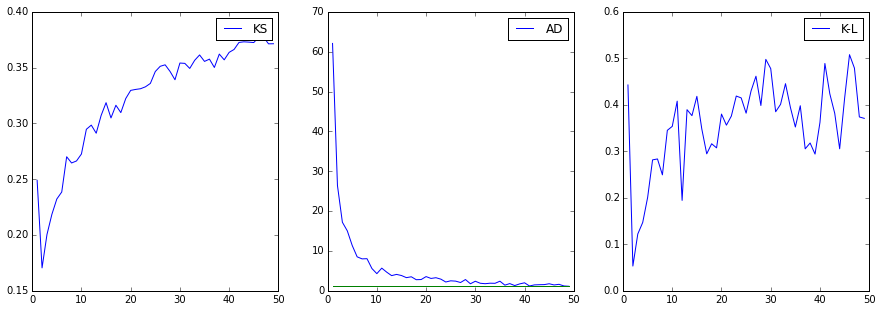

In [9]:
fig = pl.figure(figsize = (15,5))
fig.add_subplot(131)
pl.plot(narray, ks_b, label='KS')
pl.legend()

fig.add_subplot(132)
pl.plot(narray, ad_b,  label='AD')
pl.plot([narray[0], narray[-1]],[threshold, threshold])
pl.plot()
pl.plot()
pl.legend()

fig.add_subplot(133)
pl.plot(narray, kl_b, label='K-L')

pl.legend()